In [2]:
from __future__ import print_function

import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

import sklearn

In [3]:
from sklearn.linear_model import ElasticNet, Ridge, Lasso

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [4]:
df = pd.read_csv('data/analytic_base_table.csv')

df.shape

(1863, 40)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
y = df.tx_price

X = df.drop('tx_price', axis = 1)

_Passing the argument_ `'test_size = 0.2'` _sets aside 20% of the observations for the test set._

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state = 1234)

In [12]:
data = [X_train, X_test, y_train, y_test]

data_len = [print(len(x)) for x in data]

1490
373
1490
373


In [13]:
X_train.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_and_two,during_recession,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000
mean,3.434,2.579,2322.785,12746.660,0.879,39.496,4.389,5.005,5.186,39.561,3.362,22.909,15.770,38.509,69.471,65.013,464.266,139.610,6.510,2.779,0.093,0.266,24.344,17.940,0.360,0.024,0.059,0.066,0.119,0.038,0.268,0.066,0.073,0.644,0.189,0.060,0.034,0.419,0.581
std,1.073,0.930,1297.102,34805.545,0.327,46.986,4.498,8.442,7.443,52.335,4.694,25.724,17.999,6.615,19.865,17.093,227.250,71.511,1.975,0.517,0.290,0.442,21.209,6.452,0.480,0.154,0.236,0.248,0.324,0.190,0.443,0.248,0.260,0.479,0.392,0.238,0.180,0.494,0.494
min,1.000,1.000,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,22.000,11.000,5.000,88.000,30.000,1.000,1.000,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3.000,2.000,1351.000,1542.000,1.000,6.000,1.000,0.000,0.000,6.000,0.000,4.000,4.000,33.000,59.000,53.250,321.000,94.000,5.000,3.000,0.000,0.000,6.000,12.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,4.000,3.000,1913.500,6183.000,1.000,21.000,3.000,2.000,3.000,20.000,2.000,15.000,10.000,38.000,74.000,66.000,426.000,125.000,7.000,3.000,0.000,0.000,20.000,18.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
75%,4.000,3.000,3014.750,11761.000,1.000,56.000,7.000,6.000,6.000,50.000,5.000,35.000,21.000,43.000,84.000,78.000,572.000,169.000,8.000,3.000,0.000,1.000,38.000,24.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000
max,5.000,6.000,7842.000,436471.000,1.000,266.000,24.000,53.000,47.000,340.000,35.000,177.000,94.000,69.000,100.000,100.000,4508.000,1374.000,10.000,4.000,1.000,1.000,114.000,30.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


_Manual standardizing._

In [14]:
X_train_new = (X_train - X_train.mean()) / X_train.std()

In [15]:
X_train_new.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_and_two,during_recession,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000,1490.000
mean,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.269,-1.697,-1.405,-0.366,-2.688,-0.841,-0.976,-0.593,-0.697,-0.756,-0.716,-0.891,-0.876,-2.496,-2.943,-3.511,-1.656,-1.533,-2.790,-3.440,-0.319,-0.601,-1.148,-2.316,-0.749,-0.157,-0.250,-0.265,-0.368,-0.198,-0.606,-0.265,-0.281,-1.343,-0.483,-0.253,-0.186,-0.850,-1.176
25%,-0.405,-0.622,-0.749,-0.322,0.372,-0.713,-0.753,-0.593,-0.697,-0.641,-0.716,-0.735,-0.654,-0.833,-0.527,-0.688,-0.630,-0.638,-0.765,0.427,-0.319,-0.601,-0.865,-0.921,-0.749,-0.157,-0.250,-0.265,-0.368,-0.198,-0.606,-0.265,-0.281,-1.343,-0.483,-0.253,-0.186,-0.850,-1.176
50%,0.527,0.452,-0.316,-0.189,0.372,-0.394,-0.309,-0.356,-0.294,-0.374,-0.290,-0.307,-0.321,-0.077,0.228,0.058,-0.168,-0.204,0.248,0.427,-0.319,-0.601,-0.205,0.009,-0.749,-0.157,-0.250,-0.265,-0.368,-0.198,-0.606,-0.265,-0.281,0.744,-0.483,-0.253,-0.186,-0.850,0.850
75%,0.527,0.452,0.533,-0.028,0.372,0.351,0.581,0.118,0.109,0.199,0.349,0.470,0.291,0.679,0.731,0.760,0.474,0.411,0.754,0.427,-0.319,1.662,0.644,0.939,1.334,-0.157,-0.250,-0.265,-0.368,-0.198,1.650,-0.265,-0.281,0.744,-0.483,-0.253,-0.186,1.176,0.850
max,1.459,3.676,4.255,12.174,0.372,4.821,4.360,5.685,5.618,5.741,6.741,5.990,4.346,4.609,1.537,2.047,17.794,17.262,1.767,2.360,3.129,1.662,4.227,1.869,1.334,6.353,3.990,3.768,2.714,5.059,1.650,3.768,3.558,0.744,2.069,3.943,5.365,1.176,0.850


_Model Pipelines (and import standardization tool)._

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [18]:
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet' : make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'rf' : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))
}

In [20]:
check = [print(k, type(v)) for k, v in pipelines.items()]

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


In [21]:
check_1 = [print(k, '\n', v, '\n') for k, v in pipelines.items()]

lasso 
 Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=123,
   selection='cyclic', tol=0.0001, warm_start=False))]) 

ridge 
 Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=123, solver='auto', tol=0.001))]) 

enet 
 Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('elasticnet', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=123, selection='cyclic', tol=0.0001, warm_start=False))]) 

rf 
 Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomfore

_Tuning Hyperparameters_

In [24]:
lasso_hyperparameters = {
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}

ridge_hyperparameters = {
    'ridge__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}

enet_hyperparameters = {
    'elasticnet__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]
}

rf_hyperparameters = {
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features' : ['auto', 'sqrt', 0.33]
}

gb_hyperparameters = {
    'gradientboostingregressor__n_estimators' : [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth' : [1, 3, 5]
}

In [25]:
hyperparameters = {
    'lasso' : lasso_hyperparameters,
    'ridge': ridge_hyperparameters,
    'enet' : enet_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}

In [26]:
for k in ['lasso', 'ridge', 'enet', 'rf', 'gb']:
    if k in hyperparameters:
        if type(hyperparameters[k]) is dict:
            print(k, 'was found in hyperparameters, and it is a grid.')
        else:
            print(k, 'was found in hyperparameters, but it is not a grid.')
    else:
        print(k, 'was not found in hyperparameters.')

lasso was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
enet was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.


_Cross-validation_

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
model = GridSearchCV(pipelines['lasso'], hyperparameters['lasso'], 
                     cv = 10, n_jobs = -1)

In [30]:
model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=123,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [32]:
fitted_models = {}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], 
                         cv = 10, n_jobs = -1)
    
    model.fit(X_train, y_train)
    
    fitted_models[name] = model
    
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [33]:
for k, v in fitted_models.items():
    print(k, type(v))

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


In [34]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [35]:
for name, model in fitted_models.items():
    print(name, model.best_score_)

lasso 0.308627508594
ridge 0.316611158599
enet 0.342874628664
rf 0.481596734789
gb 0.486972058574


In [36]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [37]:
fitted_models['rf']

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=123,
           verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'randomforestregressor__n_estimators': [100, 200], 'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [38]:
pred = fitted_models['rf'].predict(X_test)

In [39]:
print('R^2: ', r2_score(y_test, pred))
print('MAE: ', mean_absolute_error(y_test, pred))

R^2:  0.572250974291
MAE:  67962.7578016


In [40]:
for name, model in fitted_models.items():
    pred = fitted_models[name].predict(X_test)
    
    print(name, '\n',
         '------', '\n',
         'R^2: {}'.format(r2_score(y_test, pred)), '\n',
         'MAE: {}'.format(mean_absolute_error(y_test, pred)), '\n')

lasso 
 ------ 
 R^2: 0.40888624716724375 
 MAE: 85035.54246538793 

ridge 
 ------ 
 R^2: 0.4093396476329719 
 MAE: 84978.03564808934 

enet 
 ------ 
 R^2: 0.4052451373117357 
 MAE: 86298.63725312549 

rf 
 ------ 
 R^2: 0.5722509742910005 
 MAE: 67962.75780160858 

gb 
 ------ 
 R^2: 0.5410951822821564 
 MAE: 70601.60664940192 



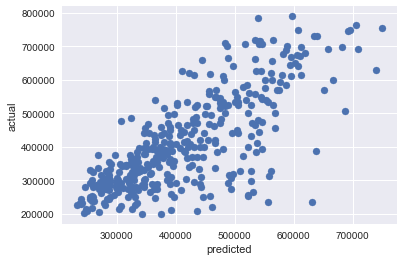

In [46]:
gb_pred = fitted_models['rf'].predict(X_test)
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [47]:
fitted_models['rf'].best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=123,
           verbose=0, warm_start=False))])

_Optimal values for hyperparameters:_

  * `n_estimators = 200`
  * `max_features = 'auto'`

In [50]:
import pickle

with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)